# Tim Rogers Week 7

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import (
    mean_absolute_error, # MAE
    mean_squared_error, # MSE
    r2_score #r2
)
from sklearn import metrics

In [2]:
file_one = 'C:/Users/Tim/Documents/train.csv'

file_two = 'C:/Users/Tim/Documents/mushrooms.csv'

In [3]:
df_part_one = pd.read_csv(file_one)
df_part_two = pd.read_csv(file_two)

In [4]:
df_part_one.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
df_part_one.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
df_part_two.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


df_part_two.info()

# Part 1 of Homework

In [5]:
def clean_data(df):
    
    #Drop the "Id" column and any features that are missing more than 40% of their values.
    df = df.drop('Id', axis='columns')
    df = df.dropna(thresh=(0.6*len(df)), axis = 1)
    return df



def fill_data(df):
    #For numerical columns, fill in any missing data with the median value.
    #For categorical columns, fill in any missing data with the most common value (mode).
    
    for col in df:
        if df[col].dtype == 'int64':
            df[col] = df[col].fillna(df[col].mean())
        elif df[col].dtype == 'float64':
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].mode())
    return df



        

In [6]:
new_df = clean_data(df_part_one)

In [52]:
new_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [53]:
new_df['LotArea'].dtype

dtype('int64')

In [7]:
another_df  = fill_data(new_df)

In [55]:
another_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [56]:
another_df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

In [8]:
last_df = pd.get_dummies(another_df, drop_first=True)

In [58]:
last_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,False,False,False,False,True,False,False,False,True,False
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,False,False,False,False,True,False,False,False,True,False
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,False,False,False,False,True,False,False,False,True,False
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,False,False,False,False,True,False,False,False,True,False


In [29]:
#Split the data into a training and test set, where 
#the SalePrice column is the target.

y = last_df['SalePrice']

x = last_df.drop('SalePrice', axis=1)

    
x_train, x_test, y_train, y_test = train_test_split(x,y , 
                                    random_state=42,  
                                   test_size=0.2,  
                                   shuffle=True)
   

In [30]:
matrix = last_df.corr()

In [31]:
matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,-0.357056,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.069836,-0.065649,...,-0.001244,0.014005,-0.045156,-0.014555,0.026359,0.016241,0.030002,0.000983,0.024359,-0.051068
LotFrontage,-0.357056,1.000000,0.306795,0.234196,-0.052820,0.117598,0.082746,0.179283,0.215828,0.043340,...,0.012674,-0.051787,0.126580,-0.023461,-0.089928,-0.037020,-0.018090,0.015818,-0.072074,0.124842
LotArea,-0.139781,0.306795,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103960,0.214103,0.111170,...,0.001076,-0.015040,0.020039,-0.005722,-0.002292,-0.013208,0.008966,-0.010781,0.005711,0.022635
OverallQual,0.032628,0.234196,0.105806,1.000000,-0.091932,0.572323,0.550684,0.410238,0.239666,-0.059119,...,0.004269,-0.021172,0.327412,-0.057962,-0.225013,-0.041677,-0.044950,-0.025515,-0.143282,0.323295
OverallCond,-0.059316,-0.052820,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.127788,-0.046231,0.040229,...,0.001299,-0.019779,-0.156175,-0.050663,0.163684,-0.038888,-0.033444,-0.023873,0.161642,-0.151659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SaleCondition_AdjLand,0.016241,-0.037020,-0.013208,-0.041677,-0.038888,-0.045601,-0.040294,-0.011959,-0.014874,-0.015130,...,-0.003073,-0.003073,-0.015827,-0.002378,0.020457,1.000000,-0.004772,-0.006177,-0.112080,-0.016038
SaleCondition_Alloca,0.030002,-0.018090,0.008966,-0.044950,-0.033444,-0.010104,-0.020727,-0.009689,0.021369,-0.026277,...,-0.005337,-0.005337,-0.027489,-0.004131,0.035530,-0.004772,1.000000,-0.010729,-0.194663,-0.027856
SaleCondition_Family,0.000983,0.015818,-0.010781,-0.025515,-0.023873,-0.035785,-0.048056,-0.009914,0.000765,-0.007929,...,-0.006909,-0.006909,-0.035587,-0.005348,0.028599,-0.006177,-0.010729,1.000000,-0.252006,-0.036062
SaleCondition_Normal,0.024359,-0.072074,0.005711,-0.143282,0.161642,-0.158427,-0.120577,-0.084241,-0.019560,0.041207,...,-0.003139,0.027414,-0.645698,-0.097031,0.634322,-0.112080,-0.194663,-0.252006,1.000000,-0.654323


In [32]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)


LinearRegression()

In [33]:
y_pred_mlr= mlr.predict(x_test)

In [34]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
892,154500,154826.930142
1105,325000,351322.235500
413,115000,90390.709979
522,159000,177315.596289
1036,315500,323142.928866


In [35]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 86.36
Mean Absolute Error: 20432.162247739114
Mean Square Error: 2726208330.880061
Root Mean Square Error: 52213.10497260301


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [44]:
features = StandardScaler().fit_transform(x)

In [64]:
pca = PCA(n_components = 4, whiten = True)

In [65]:
features_pca = pca.fit_transform(features)

In [66]:
print(features.shape)

(1460, 229)


In [67]:
print(features_pca.shape)

(1460, 4)


In [81]:

X_train_pca = pca.fit_transform(x_train)
X_test_pca = pca.transform(x_test)

In [69]:
x.shape

(1460, 229)

In [70]:
test_features_pca  

array([[533.11582104, 580.51690756, 673.29374183, 304.76655635],
       [509.27130376, 360.64327536, 689.95954819, 112.92244709],
       [459.20204274, 453.38016903, 590.21621561, 259.53019371],
       ...,
       [485.49691419, 453.73599343, 564.49041759, 259.9385035 ],
       [498.20167185, 369.18743725, 656.9309265 , 166.29164755],
       [535.02871617, 261.62410435, 426.26736887, 236.22719308]])

In [82]:
pca_regression = mlr.fit(X_train_pca, y_train)

In [83]:
len(pca_pred_mlr)

1168

In [84]:
pca_pred_mlr= mlr.predict(X_test_pca)

In [86]:
len(pca_pred_mlr)

292

In [88]:
len(y_test)

292

In [96]:
meanAbErr = metrics.mean_absolute_error(y_test, pca_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, pca_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, pca_pred_mlr))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
r2 = r2_score(y_test, pca_pred_mlr)
print("R² score:", r2)

Mean Absolute Error: 31646.16397781744
Mean Square Error: 2310182300.6039653
Root Mean Square Error: 48064.35582220951
R² score: 0.6988156385787979


# Part II of assignment

In [4]:
df_part_two.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df_predict = pd.get_dummies(df_part_two, drop_first=True)

In [5]:
df_predict.shape

(8124, 96)

In [6]:
#Split the data into a training and test set.

y = df_predict['class_p']

#(classes: edible=e, poisonous=p)

x = df_predict.loc[:,df_predict.columns!='class_p']

    
x_train, x_test, y_train, y_test = train_test_split(x,y , 
                                    random_state=42,  
                                   test_size=0.2,  
                                   shuffle=True)
   

In [7]:
df_predict

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,True,False,False,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,True,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,False,True,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False
8121,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,True,False,False,True,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False


In [8]:

import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [21]:

clf = DecisionTreeClassifier(max_depth = 2, 
                             random_state = 0)

clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [22]:
y_pred = clf.predict(x_test)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.944


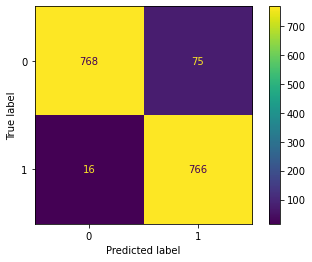

In [24]:
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [25]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

[Text(697.5, 906.0, 'X[22] <= 0.5\ngini = 0.499\nsamples = 6499\nvalue = [3365, 3134]'),
 Text(348.75, 543.6, 'X[42] <= 0.5\ngini = 0.284\nsamples = 3666\nvalue = [627, 3039]'),
 Text(174.375, 181.19999999999993, 'gini = 0.124\nsamples = 3221\nvalue = [213, 3008]'),
 Text(523.125, 181.19999999999993, 'gini = 0.13\nsamples = 445\nvalue = [414, 31]'),
 Text(1046.25, 543.6, 'X[80] <= 0.5\ngini = 0.065\nsamples = 2833\nvalue = [2738, 95]'),
 Text(871.875, 181.19999999999993, 'gini = 0.026\nsamples = 2775\nvalue = [2738, 37]'),
 Text(1220.625, 181.19999999999993, 'gini = 0.0\nsamples = 58\nvalue = [0, 58]')]

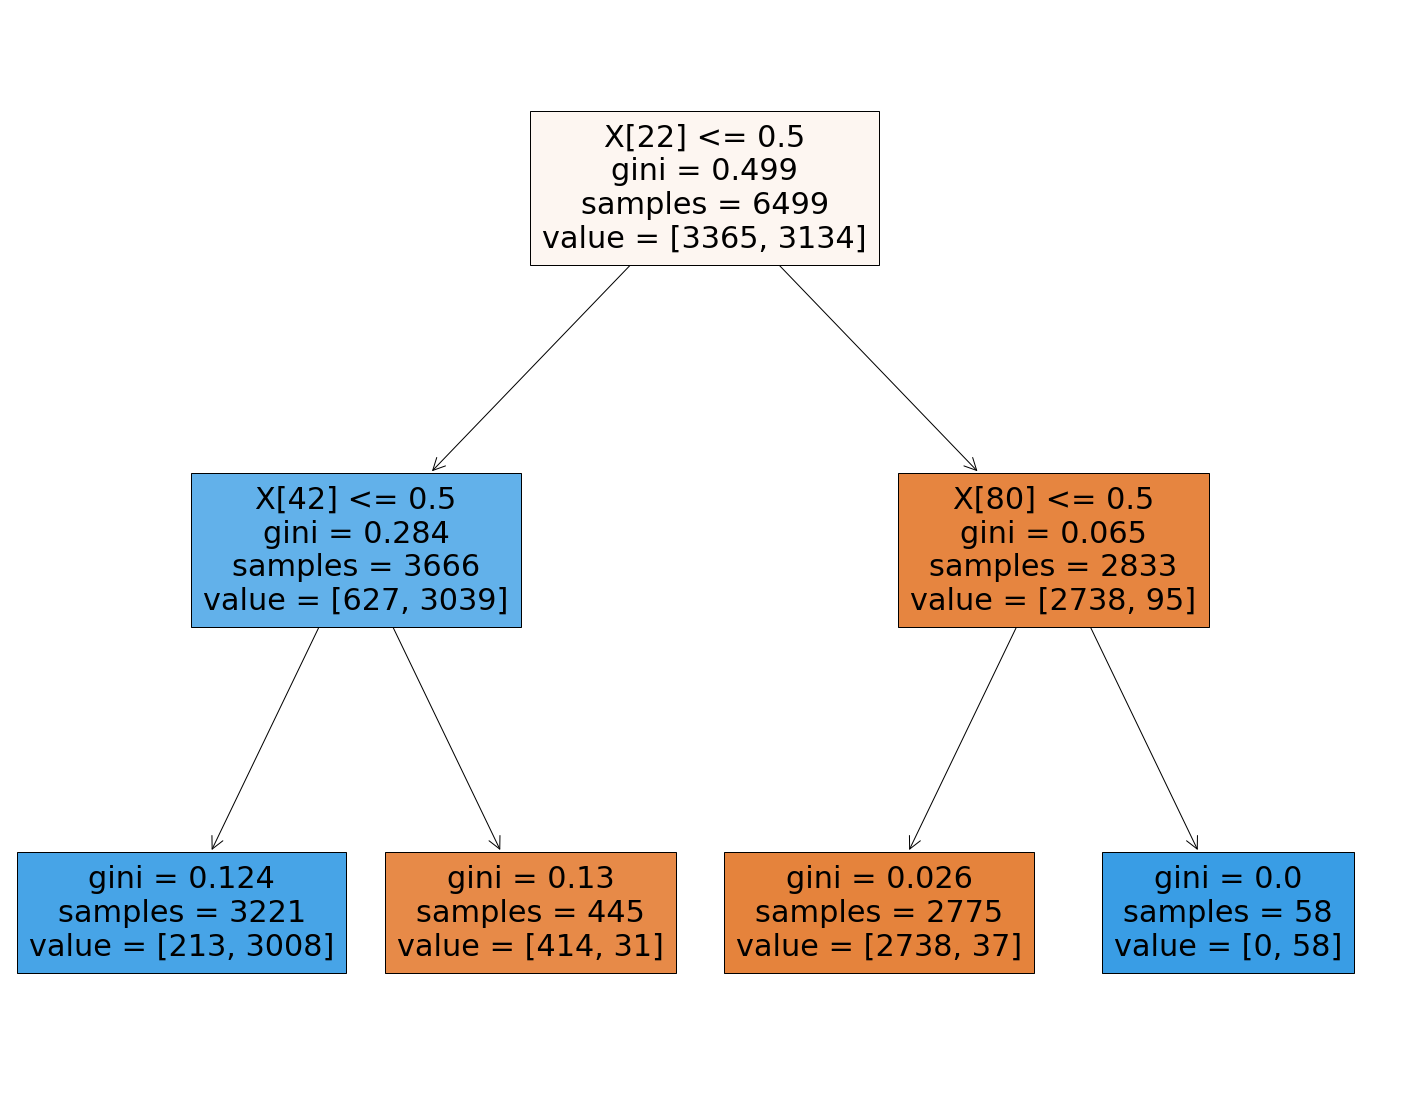

In [27]:
fig = plt.figure(figsize=(25,20))
tree.plot_tree(clf,
                   filled=True)